<a href="https://colab.research.google.com/github/alzaidawi/PORTAL_code/blob/main/pixels_seg_ML_to_predict_different_pores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#•	Gas pore:  circularity > 0.80
#•	Crack pore:  aspect ratio > 3.5  and circularity < 0.35
#•	Un-melted particle (inside the pore there is a defect)
#•	Lack of fusion pore: all other defects it can be:
  1. Keyhole pore or
  2. Process pores.  (Keyhole pore.)  not circle



orginal image
img.shape (642, 503, 3)


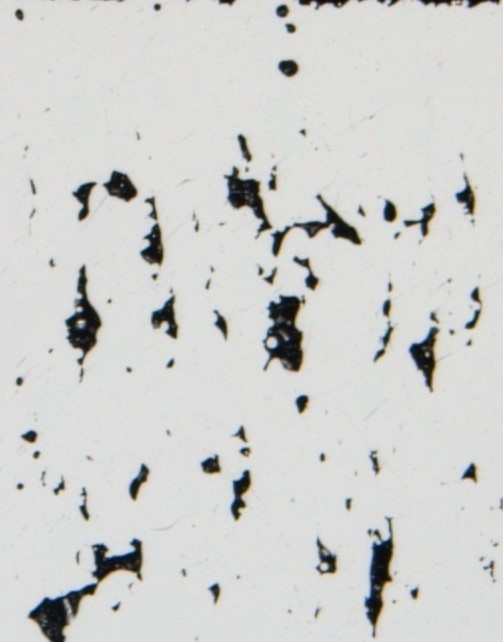

gray image
gray image.shape (642, 503)


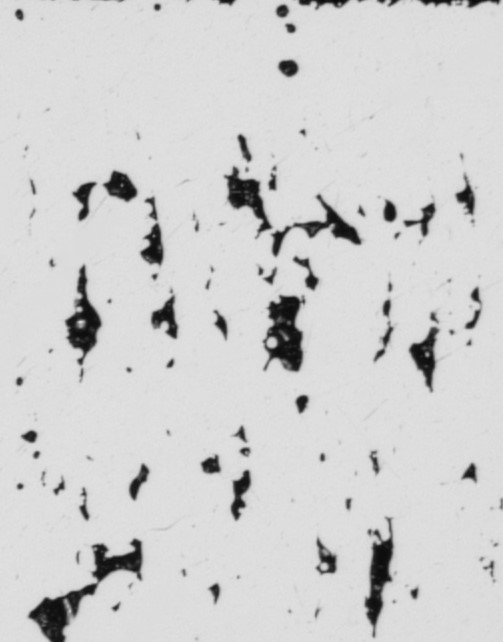

In [1]:
## load the training image
from skimage.io import imread, imshow
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import time
from google.colab.patches import cv2_imshow

img_org = cv2.imread('/content/new_cropped_001.jpg')
#img_org = img_org[:, 300:1600]  ## croped image used with only our data images
print('orginal image')
print('img.shape',img_org.shape)
cv2_imshow(img_org)

img = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
print('gray image')
print('gray image.shape',img.shape)
cv2_imshow(img)

# plt.imshow(img)
# plt.axis('off')
# plt.show()

# Extract pixel features

In [2]:
#Here, if we have multichannel image then extract the right channel instead of converting the image to grey.
#For example, if DAPI contains nuclei information, extract the DAPI channel image first.
#Multiple images can be used for training. For that, we need to concatenate the data
#Save original image pixels into a data frame. This is our Feature #1.

img2 = img.reshape(-1) ## reshape the image into single column
print('img converted to one column',img2.shape)
df = pd.DataFrame()
t0 = time.time()   ## starting time

df['Original Image'] = img2

# #Generate Gabor features
# num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
# kernels = []
# for theta in range(2):   #Define number of thetas
#     theta = theta / 4. * np.pi
#     for sigma in (1, 3):  #Sigma with 1 and 3
#         for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
#             for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5


#                 gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
# #                print(gabor_label)
#                 ksize=3  # we can use 9 if the image big size
#                 kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
#                 kernels.append(kernel)
#                 #Now filter the image and add values to a new column
#                 fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
#                 filtered_img = fimg.reshape(-1)
#                 df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
#                 print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
#                 num += 1  #Increment for gabor column label

########################################
#Gerate OTHER FEATURES out of pixels and add them to the data frame

#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

Kernal_size = 3

#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=Kernal_size)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=Kernal_size)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe

feat_ext_time = time.time()-t0
local_time_feature_rxtraction = time.localtime(feat_ext_time)

img converted to one column (322926,)


input image (642, 503)
gray image (322926,)


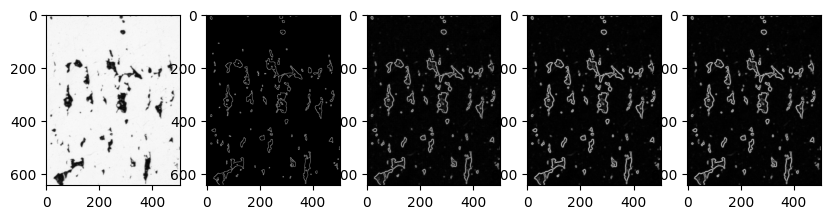

In [3]:
# show some pf the feature images
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(10,10))
print('input image',img.shape)
print('gray image',img2.shape)

axes[0].imshow(np.asanyarray(df['Original Image']).reshape(img.shape), cmap=plt.cm.gray)
axes[1].imshow(np.asanyarray(df['Canny Edge']).reshape(img.shape), cmap=plt.cm.gray)
axes[2].imshow(np.asanyarray(df['Roberts']).reshape(img.shape), cmap=plt.cm.gray)
axes[3].imshow(np.asanyarray(df['Sobel']).reshape(img.shape), cmap=plt.cm.gray)
axes[4].imshow(np.asanyarray(df['Scharr']).reshape(img.shape), cmap=plt.cm.gray)

input image (642, 503)
gray image (322926,)


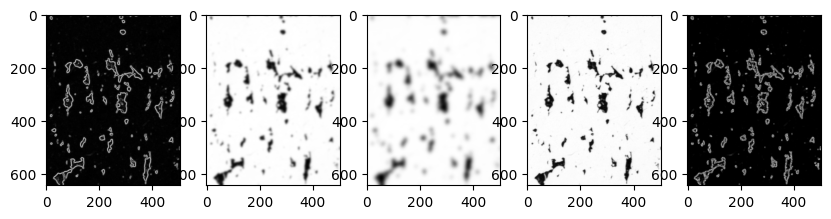

In [4]:
# show some pf the feature images
import matplotlib.pyplot as plt2
fig, axes = plt2.subplots(1, 5, figsize=(10,10))
print('input image',img.shape)
print('gray image',img2.shape)

axes[0].imshow(np.asanyarray(df['Prewitt']).reshape(img.shape), cmap=plt.cm.gray)
axes[1].imshow(np.asanyarray(df['Gaussian s3']).reshape(img.shape), cmap=plt.cm.gray)
axes[2].imshow(np.asanyarray(df['Gaussian s7']).reshape(img.shape), cmap=plt.cm.gray)
axes[3].imshow(np.asanyarray(df['Median s3']).reshape(img.shape), cmap=plt.cm.gray)
axes[4].imshow(np.asanyarray(df['Variance s3']).reshape(img.shape), cmap=plt.cm.gray)

# output (pore shapes) labels and create a mask

# try to use the parent pores

mean 21.058333333333334
min 1.5
max 59.5
var 252.13409722222224
median 14.5
sd 15.878730970144378
count 60
my_mean_minus_sd -26.577859577099805
my_mean_plus_sd 68.69452624376648


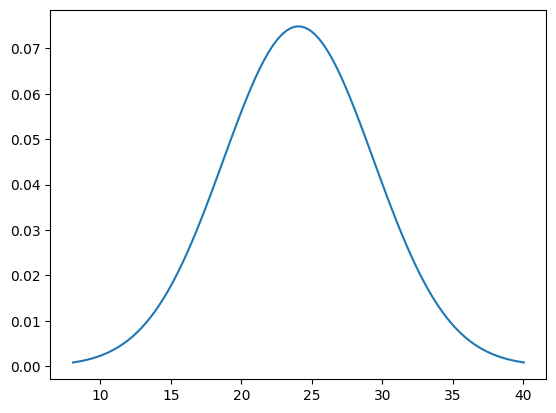

mean_minus_sd 8.05826
(3 sigma) mean_plus_sd 40.04574
1 sigma= 0.00019
0.00018771100000000002
mean 24.052
min 2.0
max 186.0
var 807.8206080000001
median 14.0
sd 28.422185137670187
count 200
process_pore__mean_minus_sd -61.214555413010565
process_pore_mean_plus_sd 109.31855541301056


In [74]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

# area=[12.5,23.5,80.0,90.0,28.0,138.0,11.0,229.0,36.0,2.0,23.5,59.5,188.0,38.5,80.5,35.5,10.0,647.0,10.5,4.0,10.0,7.0,2291.5,16.5,12.5,14.0,111.5,292.0,10.0,73.5,177.5,17.0,89.0,797.0,288.0,499.5,41.5,393.5,76.0,82.5,249.0,15.5,139.0,7.0,37.0,222.0,196.5,7.0,4.0,8.5,271.5,102.5,51.5,92.5,32.5,59.0,56.0,1260.5,12.5,135.5,332.5,15.0,35.0,643.5,2751.5,29.0,894.5,459.0,82.5,32.0,69.0,11.0,6.0,72.0,188.0,41.5,92.5,7.0,2212.0,1.5,75.5,500.5,63.5,33.5,46.5,4.0,125.5,62.0,101.0,344.5,11.0,669.0,1116.5,1908.5,629.5,25.0,106.0,617.0,866.0,39.5,1727.0,252.5,10.0,9.5,16.0,44.5,12.5,29.5,328.5,41.0,69.5,2.0,13.5,2.0,18.0,384.0,148.0,7.0,7.0,135.0,218.5,86.0]
# print('mean',np.mean(area))
# print('min',np.min(area))
# print('max',np.max(area))
# print('var',np.var(area))
# print('median',np.median(area))
# print('sd',np.std(area))
# print('count', len(area))
# for i in area:
#   if i < 62:
#     print(i)
area_less_median=[12.5,23.5,28.0,11.0,36.0,2.0,23.5,59.5,38.5,35.5,10.0,10.5,4.0,10.0,7.0,16.5,12.5,14.0,10.0,17.0,41.5,15.5,7.0,37.0,7.0,4.0,8.5,51.5,32.5,59.0,56.0,12.5,15.0,35.0,29.0,32.0,11.0,6.0,41.5,7.0,1.5,33.5,46.5,4.0,11.0,25.0,39.5,10.0,9.5,16.0,44.5,12.5,29.5,41.0,2.0,13.5,2.0,18.0,7.0,7.0]
print('mean',np.mean(area_less_median))
print('min',np.min(area_less_median))
print('max',np.max(area_less_median))
print('var',np.var(area_less_median))
print('median',np.median(area_less_median))
print('sd',np.std(area_less_median))
print('count', len(area_less_median))
# for i in area_less_median:
#   if i < 14:
#     print(i)
# area_sec_less_median=[12.5,11.0,2.0,10.0,10.5,4.0,10.0,7.0,12.5,10.0,7.0,7.0,4.0,8.5,12.5,11.0,6.0,7.0,1.5,4.0,11.0,10.0,9.5,12.5,2.0,13.5,2.0,7.0,7.0]
# print('mean',np.mean(area_sec_less_median))
# print('min',np.min(area_sec_less_median))
# print('max',np.max(area_sec_less_median))
# print('var',np.var(area_sec_less_median))
# print('median',np.median(area_sec_less_median))
# print('sd',np.std(area_sec_less_median))
# print('count', len(area_sec_less_median))

my_mean_minus_sd = np.mean(area_less_median) - 3*np.std(area_less_median)
my_mean_plus_sd = np.mean(area_less_median) + 3*np.std(area_less_median)
print('my_mean_minus_sd',my_mean_minus_sd)
print('my_mean_plus_sd',my_mean_plus_sd)
# for i in area_sec_less_median:
#   if i < 8:
#     print(i)
# mu = 0.0000859  # mean pore area in mm
# variance = 0.0000000103 # var of the area pore

mu = 24.052  # mean pore area in pixels for process_pore_area_inpixel
variance = 28.422185137670187 # var of the area pore in pixels for process_pore_area_inpixel

sigma = math.sqrt(variance)
x_coor = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x_coor, stats.norm.pdf(x_coor, mu, sigma))
plt.show()
mean_minus_sd = mu - 3*sigma
mean_plus_sd = mu + 3*sigma
print('mean_minus_sd',round(mean_minus_sd,5))
print('(3 sigma) mean_plus_sd',round(mean_plus_sd,5))
print('1 sigma=',round(0.00018771100000000002,5))
print(0.0000859 + 0.000101811)

process_pore_area_inpixel=[1.25E+01,2.10E+01,5.49E+00,9.99E+00,3.10E+01,1.60E+01,9.99E+00,1.65E+01,1.10E+01,3.40E+01,4.00E+00,4.00E+00,2.00E+00,2.05E+01,1.40E+01,1.13E+02,2.10E+01,7.00E+00,2.55E+01,2.50E+01,5.49E+00,1.90E+01,1.70E+01,5.60E+01,5.05E+01,5.49E+00,2.00E+00,6.85E+01,1.25E+01,7.85E+01,1.35E+01,2.00E+00,2.00E+00,8.35E+01,9.99E+00,9.49E+00,8.99E+00,2.00E+00,2.95E+01,3.35E+01,5.99E+00,1.10E+01,7.00E+00,2.15E+01,6.60E+01,1.50E+01,1.85E+01,1.62E+02,4.55E+01,2.00E+00,2.00E+00,4.40E+01,1.50E+01,2.25E+01,9.99E+00,1.86E+02,2.35E+01,1.90E+01,2.40E+01,7.00E+00,3.65E+01,3.95E+01,4.80E+01,3.55E+01,6.60E+01,4.50E+01,2.00E+00,1.15E+01,1.11E+02,2.00E+00,1.40E+01,2.10E+01,4.10E+01,2.40E+01,8.51E+00,8.30E+01,2.40E+01,7.00E+00,3.35E+01,1.25E+01,4.00E+00,2.90E+01,2.40E+01,8.51E+00,2.00E+00,2.00E+00,4.25E+01,3.05E+01,3.30E+01,2.00E+00,1.04E+02,1.20E+01,1.25E+01,2.85E+01,1.50E+01,2.65E+01,2.00E+00,2.00E+00,7.00E+00,2.25E+01,2.30E+01,5.49E+00,5.95E+01,1.35E+01,8.51E+00,1.13E+02,7.00E+00,1.25E+01,2.00E+00,8.45E+01,3.55E+01,5.80E+01,8.20E+01,1.85E+01,2.10E+01,5.10E+01,2.00E+00,2.20E+01,1.35E+01,1.25E+01,3.65E+01,3.65E+01,9.99E+00,4.00E+00,1.50E+01,2.00E+00,7.00E+00,7.20E+01,1.30E+01,6.20E+01,4.00E+00,8.51E+00,6.05E+01,2.00E+00,2.65E+01,8.51E+00,2.00E+00,8.51E+00,7.40E+01,2.05E+01,7.00E+00,2.00E+00,2.35E+01,2.00E+00,4.25E+01,1.65E+01,6.00E+01,7.00E+00,5.35E+01,4.35E+01,7.00E+00,2.00E+00,5.99E+00,2.45E+01,1.20E+01,6.10E+01,5.70E+01,5.49E+00,2.70E+01,2.00E+00,1.45E+01,9.99E+00,2.00E+00,2.00E+00,5.49E+00,7.00E+00,4.00E+00,1.75E+01,2.00E+00,1.50E+01,1.55E+01,2.00E+00,8.51E+00,2.85E+01,1.65E+01,2.00E+00,4.00E+00,2.25E+01,2.00E+00,2.00E+00,2.00E+00,5.49E+00,2.00E+00,1.50E+01,7.00E+00,2.00E+00,2.75E+01,2.00E+00,4.00E+00,4.00E+00,7.50E+00,4.00E+00,4.25E+01,1.40E+01,4.00E+00,7.00E+01,4.45E+01,4.00E+00,4.00E+00,8.70E+01]
print('mean',np.mean(process_pore_area_inpixel))
print('min',np.min(process_pore_area_inpixel))
print('max',np.max(process_pore_area_inpixel))
print('var',np.var(process_pore_area_inpixel))
print('median',np.median(process_pore_area_inpixel))
print('sd',np.std(process_pore_area_inpixel))
print('count', len(process_pore_area_inpixel))

process_pore_mean_minus_sd = np.mean(process_pore_area_inpixel) - 3*np.std(process_pore_area_inpixel)
process_pore_mean_plus_sd = np.mean(process_pore_area_inpixel) + 3*np.std(process_pore_area_inpixel)
print('process_pore__mean_minus_sd',process_pore_mean_minus_sd)
print('process_pore_mean_plus_sd',process_pore_mean_plus_sd)


the binary image
binary shape (642, 503)


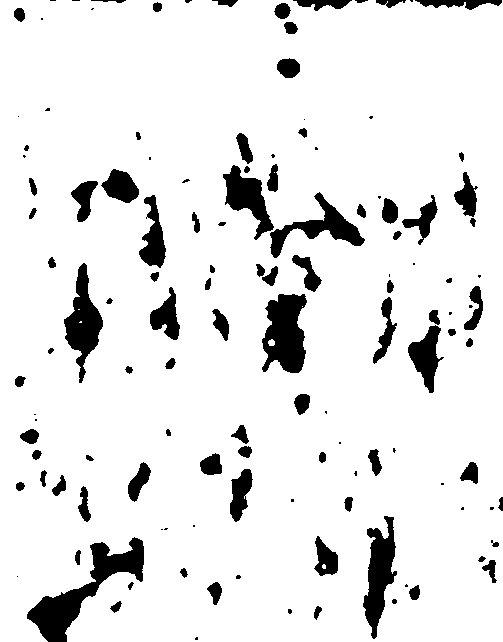

len main contours 126
cnt_area_list [316747.0, 12.5, 23.5, 80.0, 90.0, 28.0, 138.0, 11.0, 229.0, 36.0, 2.0, 23.5, 59.5, 188.0, 38.5, 80.5, 35.5, 10.0, 647.0, 10.5, 4.0, 10.0, 7.0, 2291.5, 16.5, 12.5, 14.0, 111.5, 292.0, 10.0, 73.5, 177.5, 17.0, 89.0, 797.0, 288.0, 499.5, 41.5, 393.5, 76.0, 82.5, 249.0, 15.5, 139.0, 7.0, 37.0, 222.0, 196.5, 7.0, 4.0, 8.5, 271.5, 102.5, 51.5, 92.5, 32.5, 59.0, 56.0, 1260.5, 12.5, 135.5, 332.5, 15.0, 35.0, 643.5, 2751.5, 29.0, 0.0, 894.5, 459.0, 82.5, 32.0, 69.0, 11.0, 6.0, 72.0, 188.0, 41.5, 92.5, 7.0, 2212.0, 1.5, 0.0, 75.5, 500.5, 63.5, 33.5, 46.5, 4.0, 125.5, 62.0, 101.0, 344.5, 11.0, 669.0, 1116.5, 1908.5, 629.5, 25.0, 106.0, 617.0, 866.0, 39.5, 1727.0, 252.5, 0.0, 10.0, 9.5, 16.0, 44.5, 12.5, 29.5, 328.5, 41.0, 69.5, 2.0, 13.5, 2.0, 18.0, 384.0, 148.0, 7.0, 7.0, 135.0, 218.5, 86.0]
length sorted_area_list_1 122
sorted_area_list_1 36
twenty_persent_of_area_list [ 1.5  2.   2.   2.   4.   4.   4.   6.   7.   7.   7.   7.   7.   7.
  8.5  9.5 10.  10. 

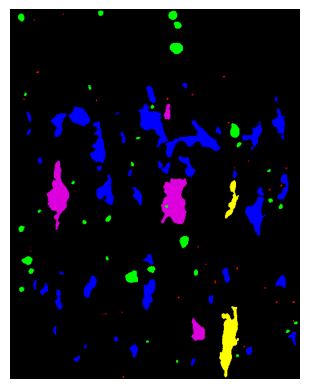

In [6]:
# Threshold the image to obtain binary image
ret, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)   ## check from here
# Find contours in the binary image
print('the binary image')
print('binary shape', binary.shape)
cv2_imshow(binary)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print('len main contours', len(contours))
max_cnt = max(contours, key = cv2.contourArea)

######################### new code
max_area = cv2.contourArea(max_cnt)
cnt_area_list = []
for f, contour in enumerate(contours):
    cnt_rect = cv2.minAreaRect(contour)
    cnt_area = cv2.contourArea(contour)
    cnt_area_list.append(cnt_area)
print('cnt_area_list',cnt_area_list)
area_list = [item for item in cnt_area_list if item < max_area]
area_list_1 = [item for item in area_list if item > 0]
median_area = np.median(area_list_1)

sorted_area_list_1 = np.sort(area_list_1)
#print('sorted_area_list_1',sorted_area_list_1)
print('length sorted_area_list_1',len(sorted_area_list_1))
twenty_persent_list=int((len(sorted_area_list_1))*0.3)
print('sorted_area_list_1',twenty_persent_list)
twenty_persent_of_area_list = sorted_area_list_1[:twenty_persent_list]
print('twenty_persent_of_area_list',twenty_persent_of_area_list)

sorted_list_median_area_2 = np.median(twenty_persent_of_area_list)
sorted_list_mean_area_2 = np.mean(twenty_persent_of_area_list)
sorted_list_std_area_2 = np.std(twenty_persent_of_area_list)
sorted_list_mean_minus_sd = sorted_list_mean_area_2 - 3*sorted_list_std_area_2
sorted_list_mean_plus_sd = sorted_list_mean_area_2 + 3*sorted_list_std_area_2
print('sorted_list_max_area_2',np.max(twenty_persent_of_area_list))
print('sorted_list_min_area_2',np.min(twenty_persent_of_area_list))
print('sorted_list_median_area_2',sorted_list_median_area_2)
print('sorted_list_mean_area_2',sorted_list_mean_area_2)
print('sorted_list_std_area_2',sorted_list_std_area_2)
print('sorted_list_mean_minus_sd',sorted_list_mean_minus_sd)
print('sorted_list_mean_plus_sd',sorted_list_mean_plus_sd)
print('count_process_pores sorted list',len(twenty_persent_of_area_list))

area_list_2 = [item for item in area_list_1 if item < median_area]
median_area_2 = np.median(area_list_2)
mean_area_2 = np.mean(area_list_2)
std_area_2 = np.std(area_list_2)
mean_minus_sd = mean_area_2 - 3*std_area_2
mean_plus_sd = mean_area_2 + 3*std_area_2
print('max_area_2',np.max(area_list_2))
print('min_area_2',np.min(area_list_2))
print('median_area_2',median_area_2)
print('mean_area_2',mean_area_2)
print('std_area_2',std_area_2)
print('mean_minus_sd',mean_minus_sd)
print('mean_plus_sd',mean_plus_sd)
print('count_process_pores',len(area_list_2))
######################### new code
# Create an empty binary mask for each contour
masks = [np.zeros(binary.shape, dtype=np.uint8) for _ in contours]
count_no_child = []
count_with_child = []
# Loop through each contour
for i, cnt in enumerate(contours):
    rect = cv2.minAreaRect(cnt)
    area = cv2.contourArea(cnt)
    hierarchy_entry = hierarchy[0][i] ## new line

    #max_area = cv2.contourArea(max_cnt)

    if area != max_area and area > 2: # if the current contour area is not equal to workpiece area
      #print('len main contours without max and min area', len(contours))
      # if hierarchy_entry[2] == -1: # Check if the contour is a pore (no child contours)
      if hierarchy[0][i][2] == -1 and (hierarchy[0][i][1] != -1 or hierarchy[0][i][0] != -1): # Check if the contour is a pore (no child contours)
      #if hierarchy[0][i][2] == -1: # Check if the contour is a pore (no child contours)
        count_no_child.append(1)
        (cx, cy), (w, h), angle = rect # No conversion required in the aspect ratio the unit divided
        aspect_ratio = max(w, h) / min(w, h)
        #print("aspect ratio", aspect_ratio)
        perimeter = cv2.arcLength(cnt, True)
        pore_circularities = 4 * np.pi * (area / (perimeter * perimeter))
        #print("pore_circularities", pore_circularities)
        # Get the shape of the contour
        ## process pores= if (area>mean-SD) and (area<mean+SD)   =====> use the distriburion of the veriance
        ## mean-SD = mean area - sqrt(area var) or area SD
        ## mean+SD = mean area + sqrt(area var) or area SD
        if area > sorted_list_mean_minus_sd and area < sorted_list_mean_plus_sd:
          annotation = 1 # process pore red color
        elif pore_circularities >=  0.80 and area > 0.00039:
          annotation = 2 ## Gas pore (circle) green color
        elif aspect_ratio >= 3.5 and pore_circularities <  0.35:
          annotation = 3 ## (1) crack pore (line) yellow color
        else:
          annotation = 4  # blue color
      else: # Check if the contour is a pore (with child contours)
        if hierarchy[0][i][1] != -1 or hierarchy[0][i][0] != -1:  # if it is not the child
          #print('iam in child pores')
          count_with_child.append(1)
          annotation = 5   # (220, 0, 220)

      # Fill the mask with the annotation value
      cv2.drawContours(masks[i], [cnt], 0, annotation, -1)
      cv2.drawContours(masks[i], [cnt], 0, 0, 1)  # Add class 0 label (black border),  last parameter is the thickness of the contour crack (line) to be drawn

print('count the contour without child', len(count_no_child))
print('count the contour with child', len(count_with_child))
# Combine all masks to create the final annotation image
annotation = np.zeros(binary.shape, dtype=np.uint8)
for mask in masks:
  annotation[mask > 0] = mask[mask > 0]

# Color the pixels belonging to each contour  RGB=red,green,blue
colors = {1: (255, 0, 0), 2: (0, 255, 0), 3: (255, 255, 0), 4: (0, 0, 255), 5: (220, 0, 220)}
annotated_img = np.zeros_like(img_org)

for annotation_value, color in colors.items():
  pixels_of_certain_type = np.argwhere(annotation == annotation_value)
  for x,y in pixels_of_certain_type:
    annotated_img[x, y] = np.array(color)

# Show the final annotated image
print('the annotated image')
print('annotated_img shape', annotated_img.shape)
#cv2_imshow(annotated_img)
plt.imsave('/content/labeled_train_img.jpg', annotated_img)


plt.imshow(annotated_img)
plt.axis('off')
plt.show()

# Add the labels variable then save the features and labels into csv file

In [33]:
labeled_img1 = annotation.reshape(-1) ### here is the change
print('labeled_img1 shape', labeled_img1.shape)
print('annotation shape', annotation.shape)

df['Labels'] = labeled_img1
#####################################
print('the unique labels', df['Labels'].unique())
print('the count of the unique labels', df['Labels'].value_counts())

#print("labeled_img1", labeled_img1[88600:88829])
#df.to_csv("before_removing_pixels_pixels_features_and_lables.csv")
#df = df[df['Labels'] != 0] ## to remove the pixels of the background which not represensetive to our objects
###print(df.head())
df.to_csv("pixels_features_and_lables.csv")

labeled_img1 shape (322926,)
annotation shape (642, 503)
the unique labels [0 1 3 4 2]
the count of the unique labels 0    296780
3     14717
4      5512
1      3213
2      2704
Name: Labels, dtype: int64


In [ ]:
#############################################################################
# Handling Imbalanced data
###########################################
def balanced_classes():
  print('Technique of Up-sample minority class and Down-sample the majority class')
  print('using the same number of the pixels in Ellipse class==3 for all other classes')
  from sklearn.utils import resample
  print('Label counts of all the classes in the test image', df['Labels'].value_counts())
  count_all_classes = df['Labels'].value_counts()
  ellipse_class_count = count_all_classes[3]
  background_class_count = int((count_all_classes[0]) / 2)
  print('ellipse_class_count',ellipse_class_count)

  #Separate majority and minority classes
  df_back_graound = df.loc[df['Labels'].isin([0])]
  df_lines = df[df['Labels'] == 1]
  df_circles = df[df['Labels'] == 2]
  df_ellips = df[df['Labels'] == 3]

  # Upsample minority class and other classes separately
  # If not, random samples from combined classes will be duplicated and we run into
  #same issue as before, undersampled remians undersampled.
  df_background_resampled = resample(df_back_graound,
                                  replace=True,     # sample with replacement
                                  n_samples=background_class_count,    # to match average class which is ellipse class
                                  random_state=42) # reproducible results
  df_lines_resampled = resample(df_lines,
                                  replace=True,     # sample with replacement
                                  n_samples=background_class_count,    # to match average class
                                  random_state=42) # reproducible results
  df_circles_resampled = resample(df_circles,
                                  replace=True,     # sample with replacement
                                  n_samples=background_class_count,    # to match average class
                                  random_state=42) # reproducible results
  df_ellips_resampled = resample(df_ellips,
                                  replace=True,     # sample with replacement
                                  n_samples=background_class_count,    # to match average class which is ellipse class
                                  random_state=42) # reproducible results

  # Combine majority class with upsampled minority class
  df_upsampled = pd.concat([df_background_resampled, df_lines_resampled, df_circles_resampled, df_ellips_resampled])
  print('The classes after up/down sampling:')
  print(df_upsampled['Labels'].value_counts())

  #Define the target
  Y_upsampled = df_upsampled["Labels"].values
  #Define the independent variables
  X_upsampled = df_upsampled.drop(labels = ["Labels"], axis=1)

  return X_upsampled, Y_upsampled

# Define the dependent variable that needs to be predicted (labels) and split into train and test

In [34]:
y = df["Labels"].values
#Define the independent variables
X = df.drop(labels = ["Labels"], axis=1)

# import the classifiers

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.utils import class_weight


##https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# names = ["Nearest Neighbors", "Linear SVM","RBF SVM","Decision Tree","Random Forest","Neural Net","AdaBoost","Naive Bayes", "QDA"]
# ##,"Gaussian Process"
# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025, max_iter=100, random_state=42),
#     SVC(gamma=2, C=1, max_iter=100, random_state=42),
#     #GaussianProcessClassifier(1.0 * RBF(1.0),random_state = 42),
#     DecisionTreeClassifier(max_depth=5, random_state = 42),
#     RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1, random_state = 42),
#     MLPClassifier(alpha=1, max_iter=1000, random_state = 42),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]
## , random_state=42

# names = ["Linear_SVM","RBF_SVM","Decision_Tree","Random_Forest","Neural_Net","Naive_Bayes"]
# ##,"Gaussian Process"
# classifiers = [
#     SVC(kernel="linear", C=0.025, max_iter=100, random_state=42),
#     SVC(gamma=2, C=1, max_iter=100, random_state=42),
#     DecisionTreeClassifier(max_depth=5, random_state = 42),
#     RandomForestClassifier(max_depth=10, n_estimators=200, max_features=5, random_state = 42),
#     MLPClassifier(alpha=1, max_iter=1000, random_state = 42),
#     GaussianNB(),
# ]


# # Calculate class weights automatically
# class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)
# print('class_weights',class_weights)

names = ["Random Forest"]
# ##,"Gaussian Process"
# classifiers = [
#     RandomForestClassifier(max_depth=10, class_weight=dict(enumerate(class_weights)), n_estimators=200, max_features=5, random_state = 42)
# ]

classifiers = [
    RandomForestClassifier(max_depth=10, n_estimators=200, max_features=5, random_state = 42)
]

# Train model with all the image data

In [ ]:
# to train with the balanced classes

X, y = balanced_classes()

In [36]:
start_train_time = time.time()
for name, model in zip(names, classifiers):
  print('name', name)
  # Train the model on training data
  model.fit(X, y)

  train_time = time.time()-start_train_time
  local_train_time = time.localtime(train_time)

  # verify number of trees used. If not defined above.
  #print('Number of Trees used : ', model.n_estimators)

  #STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA AND CALCULATE THE ACCURACY SCORE
  #First test prediction on the training data itself. SHould be good.
  prediction_train = model.predict(X)
  print("prediction_train results", prediction_train[:250])
  print('X_train.shape',X.shape)
  print('prediction_train.shape',prediction_train.shape)
  print('img.shape',img.shape)
  print('type of prediction_train', type(prediction_train))

  print(name, ' CLF: Feature extraction time = H:M:S', local_time_feature_rxtraction.tm_hour,':',local_time_feature_rxtraction.tm_min,':',local_time_feature_rxtraction.tm_sec)
  print(name, ' CLF: Train time = H:M:S', local_train_time.tm_hour,':',local_train_time.tm_min,':',local_train_time.tm_sec)

  total_time = feat_ext_time+train_time
  total_time = time.localtime(total_time)
  print(name, ' CLF: Total time = H:M:S', total_time.tm_hour,':',total_time.tm_min,':',total_time.tm_sec)

  #prediction_prob_test = model.predict_proba(X_test)

  #Let us check the accuracy on test data
  from sklearn import metrics

  #First check the accuracy on training data. This will be higher than test data prediction accuracy.
  train_acc = metrics.accuracy_score(y, prediction_train)*100
  print ("Accuracy on training data = ", round(train_acc,3), '%')

  #This part commented out for SVM testing. Uncomment for random forest.
  #One amazing feature of Random forest is that it provides us info on feature importances
  #Get numerical feature importances importances = list(model.feature_importances_)

  # feature_list = list(X.columns)
  # feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
  # print('The scors or important features',feature_imp)
  # feature_imp.to_csv("important_features.csv")

  import pickle
  #Save the trained model as pickle string to disk for future use
  filename = "/content/CLF_res/{}_trained".format(name)
  pickle.dump(model, open(filename, 'wb'))

name Random Forest
prediction_train results [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 3 3 1 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3
 3 3 0 0 0 0 0 0 0 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0]
X_train.shape (322926, 10)
prediction_train.shape (322926,)
img.shape (642, 503)
type of prediction_train <class 'numpy.ndarray'>
Random Forest  CLF: Feature extraction time = H:M:S 0 : 0 : 7
Random Forest  CLF: Train time = H:M:S 0 : 1 : 41
Random Forest  CLF: Total time = H:M:S 0 : 1 : 48
Accuracy on training data =  96.053 %


# plot the RF rees

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
# Select the index of the tree you want to plot (e.g., 3rd tree)
tree_index = 0

# Plot the selected tree
plt.figure(figsize=(22, 15), dpi=300)
tree.plot_tree(model.estimators_[tree_index], filled=True, rounded=True, class_names=['0','1','2','3'])
plt.title(f'Tree {tree_index+1}')
plt.xlabel('Features')
plt.ylabel('Classes')

# Save the plot to an image file
plt.savefig('/content/predicted_images/RF_tree_image.png')
plt.show()

# **Predict using new images with the saved models**

orginal image
img.shape (642, 503, 3)


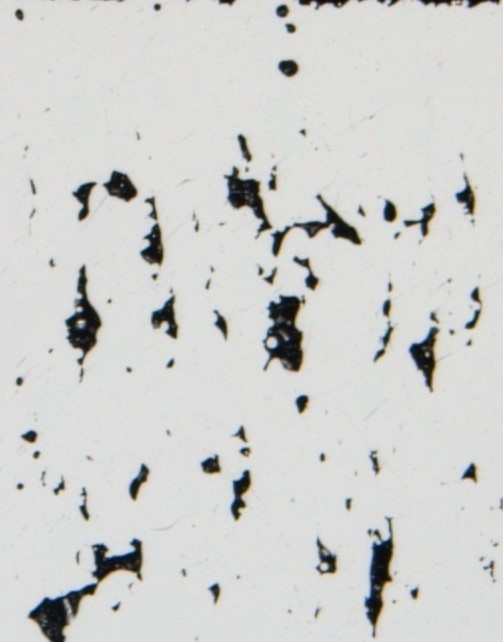

gray image
gray image.shape (642, 503)


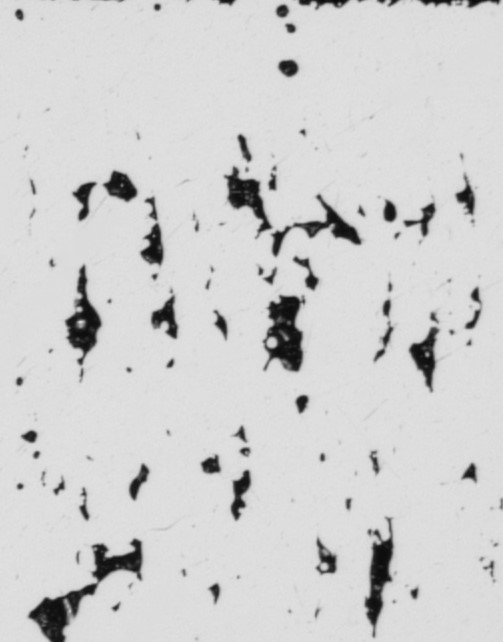

img2.shape (322926,)
img.shape (642, 503)
img2.shape (322926,)
the binary image
binary shape (642, 503)


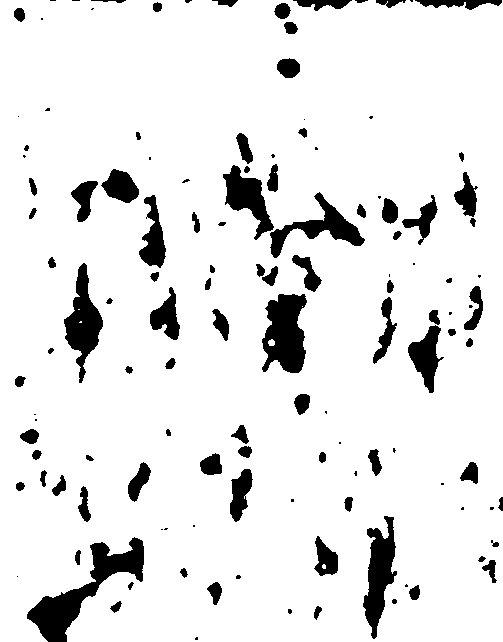

len main contours 126
count the contour without child 113
count the contour with child 4
the annotated image
annotated_img shape (642, 503, 3)
labeled_img1 shape (322926,)
annotation shape (642, 503)
the unique labels [0 1 3 4 2]
the count of the unique labels 0    296780
3     14717
4      5512
1      3213
2      2704
Name: Labels, dtype: int64
df after remove background (322926, 11)


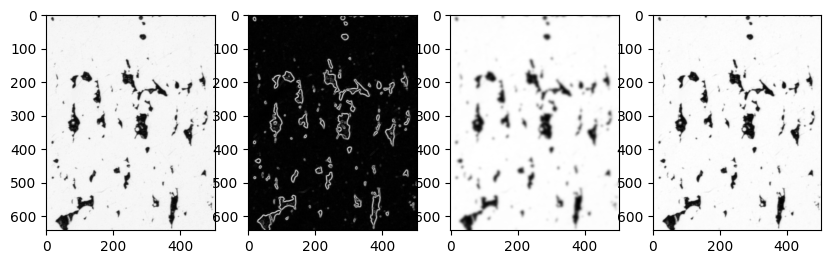

In [37]:
img_org = cv2.imread('/content/new_cropped_001.jpg')
#img_org = img_org[:, 300:1600]  ## croped image
print('orginal image')
print('img.shape',img_org.shape)
cv2_imshow(img_org)

img = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
print('gray image')
print('gray image.shape',img.shape)
cv2_imshow(img)

img2 = img.reshape(-1) ## reshape the image into single column
print('img2.shape',img2.shape)
df = pd.DataFrame()
t0 = time.time()   ## starting time

df['Original Image'] = img2

# # Generate Gabor features
# num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
# kernels = []
# for theta in range(2):   #Define number of thetas
#     theta = theta / 4. * np.pi
#     for sigma in (1, 3):  #Sigma with 1 and 3
#         for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
#             for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5


#                 gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
# #                print(gabor_label)
#                 ksize=9
#                 kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
#                 kernels.append(kernel)
#                 #Now filter the image and add values to a new column
#                 fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
#                 filtered_img = fimg.reshape(-1)
#                 df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
#                 print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
#                 num += 1  #Increment for gabor column label

########################################
 #Gerate OTHER FEATURES out of pixels and add them to the data frame

#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

Kernal_size = 3

#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=Kernal_size)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=Kernal_size)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe

feat_ext_time = time.time()-t0
local_time_feature_rxtraction = time.localtime(feat_ext_time)

# show some pf the feature images
import matplotlib.pyplot as plots
fig, axes = plots.subplots(1, 4, figsize=(10,10))
print('img.shape',img.shape)
print('img2.shape',img2.shape)

axes[0].imshow(np.asanyarray(df['Original Image']).reshape(img.shape), cmap=plots.cm.gray)
axes[1].imshow(np.asanyarray(df['Sobel']).reshape(img.shape), cmap=plots.cm.gray)
axes[2].imshow(np.asanyarray(df['Gaussian s3']).reshape(img.shape), cmap=plots.cm.gray)
axes[3].imshow(np.asanyarray(df['Median s3']).reshape(img.shape), cmap=plots.cm.gray)

#####################################################
# Threshold the image to obtain binary image
ret, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
# Find contours in the binary image
print('the binary image')
print('binary shape', binary.shape)
cv2_imshow(binary)

contours_test, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print('len main contours', len(contours_test))
max_cnt = max(contours_test, key = cv2.contourArea)

# Create an empty binary mask for each contour
masks = [np.zeros(binary.shape, dtype=np.uint8) for _ in contours_test]
count_no_child = []
count_with_child = []
# Loop through each contour
for i, cnt in enumerate(contours_test):
    rect = cv2.minAreaRect(cnt)
    area = cv2.contourArea(cnt)
    hierarchy_entry = hierarchy[0][i] ## new line
    # max_cnt = max(contours_test, key=cv2.contourArea)
    max_area = cv2.contourArea(max_cnt)
    if area != max_area and area > 2: # if the current contour area is not equal to workpiece area
      if hierarchy[0][i][2] == -1 and (hierarchy[0][i][1] != -1 or hierarchy[0][i][0] != -1): # Check if the contour is a pore (no child contours)
        count_no_child.append(1)
        (cx, cy), (w, h), angle = rect # No conversion required in the aspect ratio the unit divided
        aspect_ratio = max(w, h) / min(w, h)
        #print("aspect ratio", aspect_ratio)
        perimeter = cv2.arcLength(cnt, True)
        pore_circularities = 4 * np.pi * (area / (perimeter * perimeter))
        #print("pore_circularities", pore_circularities)
        # Get the shape of the contour
        if pore_circularities >=  0.80:
          annotation_test = 1 # Gas pore (circle) red color
        elif aspect_ratio >= 3.5 and pore_circularities <  0.35:
          annotation_test = 2 # (1) Label as a crack (line) green color
        else:
          annotation_test = 3  # blue color
      else: # Check if the contour is a pore (with child contours)
        if hierarchy[0][i][1] != -1 or hierarchy[0][i][0] != -1:  # if it is not the child
          #print('iam in child pores')
          count_with_child.append(1)
          annotation_test = 4   # (220, 0, 220)

      # Fill the mask with the annotation value
      cv2.drawContours(masks[i], [cnt], 0, annotation_test, -1)
      cv2.drawContours(masks[i], [cnt], 0, 0, 1)  # Add class 0 label (black border),  last parameter is the thickness of the contour line to be drawn

print('count the contour without child', len(count_no_child))
print('count the contour with child', len(count_with_child))
# Combine all masks to create the final annotation image
annotation_test = np.zeros(binary.shape, dtype=np.uint8)
for mask in masks:
  annotation_test[mask > 0] = mask[mask > 0]

# Color the pixels belonging to each contour
colors = {1: (255, 0, 0), 2: (0, 255, 0), 3: (0, 0, 255), 4: (220, 0, 220)}
annotated_img_test = np.zeros_like(img_org)

for annotation_value_test, color in colors.items():
  pixels_of_certain_type = np.argwhere(annotation_test == annotation_value_test)
  for x,y in pixels_of_certain_type:
    annotated_img_test[x, y] = np.array(color)


# Show the final annotated image
print('the annotated image')
print('annotated_img shape', annotated_img_test.shape)
##cv2_imshow(annotated_img)
plt.imsave('/content/labeled_test_img.jpg', annotated_img_test) ## see the saved labeled image
##plt.imshow(annotated_img_test)
##plt.axis('off')
##plt.show()

########################
labeled_img1 = annotation_test.reshape(-1) ### here is the change
print('labeled_img1 shape', labeled_img1.shape)
print('annotation shape', annotation.shape)

df['Labels'] = labeled_img1
#####################################
print('the unique labels', df['Labels'].unique())
print('the count of the unique labels', df['Labels'].value_counts())

#print("labeled_img1", labeled_img1[88600:88829])
#df.to_csv("before_removing_pixels_pixels_features_and_lables.csv")
# background_filtered = df[df['Labels'] == 0]
# print('background_filtered.shape',background_filtered.shape)
#df = df[df['Labels'] != 0] ## to remove the pixels of the background which not represensetive to our objects
print('df after remove background',df.shape)
###print(df.head())
df.to_csv("testing_image_pixels_features_and_lables.csv")


In [38]:
Y_test_image = df["Labels"].values
#Define the independent variables
X_test_image = df.drop(labels = ["Labels"], axis=1)

In [ ]:
# to test with the balanced classes

X_test_image, Y_test_image = balanced_classes()

The CLF Random Forest_trained
Y_test_image [0 0 0 ... 0 0 0]
prediction_result [0 0 0 ... 0 0 0]
Accuracy on full image data =  96.053 %
the unique predicted labels [0 1 2 3 4]
unique predicted class: 0 Count: 293708
unique predicted class: 1 Count: 845
unique predicted class: 2 Count: 229
unique predicted class: 3 Count: 25359
unique predicted class: 4 Count: 2785
Confusion Matrix [[293188     10      0   3131    451]
 [     5    786      0   2422      0]
 [    65      0    221   2246    172]
 [   210     49      3  14139    316]
 [   240      0      5   3421   1846]]


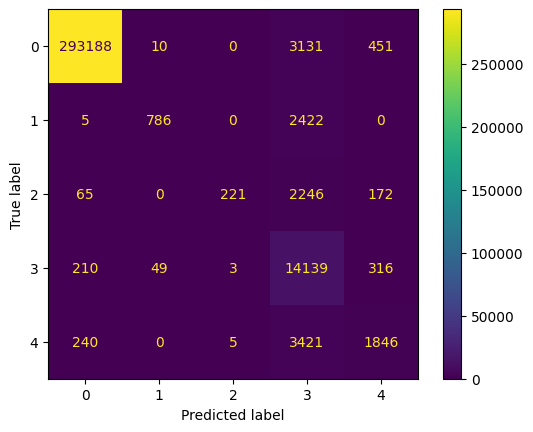

Label 0 accuracy =  0.9990458925675031
Label 1 accuracy =  0.9301775147928995
Label 2 accuracy =  0.9866071428571429
Label 3 accuracy =  0.6444981310967272
Label 4 accuracy =  1.9659211927582534
img.shape for segmented (642, 503)
img_org.shape for predicted image (642, 503, 3)
annotation_value 1
annotation_value 2
annotation_value 3
annotation_value 4
predicted_img shape (642, 503, 3)
The CLF .ipynb_checkpoints


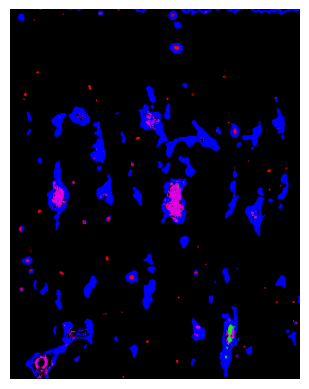

In [39]:
 # extract X from the new image
import os
models_path = "/content/CLF_res"
for model in os.listdir(models_path):  #iterate through each file
  print('The CLF', model)
  #To test the model on future datasets
  # loaded_model = pickle.load(open(filename, 'rb'))
  if (models_path + '/' + model) != '/content/CLF_res/.ipynb_checkpoints':
    loaded_model = pickle.load(open(models_path + '/' + model, 'rb'))
    prediction_result = loaded_model.predict(X_test_image)

    print('Y_test_image',Y_test_image)
    print('prediction_result', prediction_result)

    acc = metrics.accuracy_score(Y_test_image, prediction_result)*100
    print ("Accuracy on full image data = ", round(acc,3), '%')

    unique_values_pred, value_counts_pred = np.unique(prediction_result, return_counts=True)
    print('the unique predicted labels',  unique_values_pred)
    # Display the counts of each unique value
    for value, count in zip(unique_values_pred, value_counts_pred):
        print("unique predicted class:", value, "Count:", count)

    #Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(Y_test_image, prediction_result)
    print('Confusion Matrix',cm)

    import matplotlib.pyplot as plt
    from sklearn import metrics
    confusion_matrix = metrics.confusion_matrix(Y_test_image, prediction_result)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4])
    cm_display.plot()
    plt.show()

    #Print individual accuracy values for each class, based on the confusion matrix
    print("Label 0 accuracy = ",   cm[0,0] / (cm[0,0]+cm[1,0]+cm[2,0]+cm[3,0]))
    print("Label 1 accuracy = ",   cm[1,1] / (cm[0,1]+cm[1,1]+cm[2,1]+cm[3,1]))
    print("Label 2 accuracy = ",   cm[2,2] / (cm[0,2]+cm[1,2]+cm[2,2]+cm[3,2]))
    print("Label 3 accuracy = ",   cm[3,3] / (cm[0,3]+cm[1,3]+cm[2,3]+cm[3,3]))
    print("Label 4 accuracy = ",   cm[4,4] / (cm[0,4]+cm[1,4]+cm[2,4]+cm[3,4]))

    #Right metric is ROC AUC
    #Starting version 0.23.1 you can report this for multilabel problems.
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    from sklearn.metrics import roc_auc_score  #Version 0.23.1 of sklearn

    # #For roc_auc_score in the multiclass case, these must be probability estimates which sum to 1.
    # prob_y_test = loaded_model.predict_proba(X_test_image)
    # print("ROC_AUC score for imbalanced data is:")
    # print(roc_auc_score(Y_test_image, prob_y_test, multi_class='ovr', labels=[0, 1, 2, 3]))

    print('img.shape for segmented',img.shape)
    print('img_org.shape for predicted image',img_org.shape)

    # # Color the pixels belonging to each contour
    colors = {1: (255, 0, 0), 2: (0, 255, 0), 3: (0, 0, 255), 4: (220, 0, 220)}

    segmented = prediction_result.reshape((img.shape))

    predicted_img = np.zeros_like(img_org)

    for annotation_value, color in colors.items():
      print('annotation_value',annotation_value)
      pixels_of_certain_type = np.argwhere(segmented == annotation_value)
      #print('pixels_of_certain_type',pixels_of_certain_type)
      for x,y in pixels_of_certain_type:
        predicted_img[x, y] = np.array(color)

    plt.imshow(predicted_img)
    plt.axis('off')
    #cv2_imshow(predicted_img)
    print('predicted_img shape', predicted_img.shape)
    plt.imsave('/content/predicted_images/predicted_test_image_{}.jpg'.format(model), predicted_img)


